In [1]:
import numpy as np
import pandas as pd
from dataset_management import parse_traces


y_metric = 'DispFrames'

_, y_video_vod_sa_periodic = parse_traces('VoD-SingleApp-PeriodicLoad', y_metric, ['X_port.csv'])
_, y_video_vod_ba_periodic = parse_traces('VoD-BothApps-PeriodicLoad', y_metric, ['X_port.csv'])
_, y_video_vod_sa_flash = parse_traces('VoD-SingleApp-FlashcrowdLoad', y_metric, ['X_port.csv'])
_, y_video_vod_ba_flash = parse_traces('VoD-BothApps-FlashcrowdLoad', y_metric, ['X_port.csv'])


In [5]:

print((y_video_vod_sa_periodic>= 24).sum()/len(y_video_vod_sa_periodic))
print((y_video_vod_ba_periodic>= 24).sum()/len(y_video_vod_ba_periodic))
print((y_video_vod_sa_flash>= 24).sum()/len(y_video_vod_sa_flash))
print((y_video_vod_ba_flash>= 24).sum()/len(y_video_vod_ba_flash))



DispFrames    0.810806
dtype: float64
DispFrames    0.737463
dtype: float64
DispFrames    0.799006
dtype: float64
DispFrames    0.80505
dtype: float64


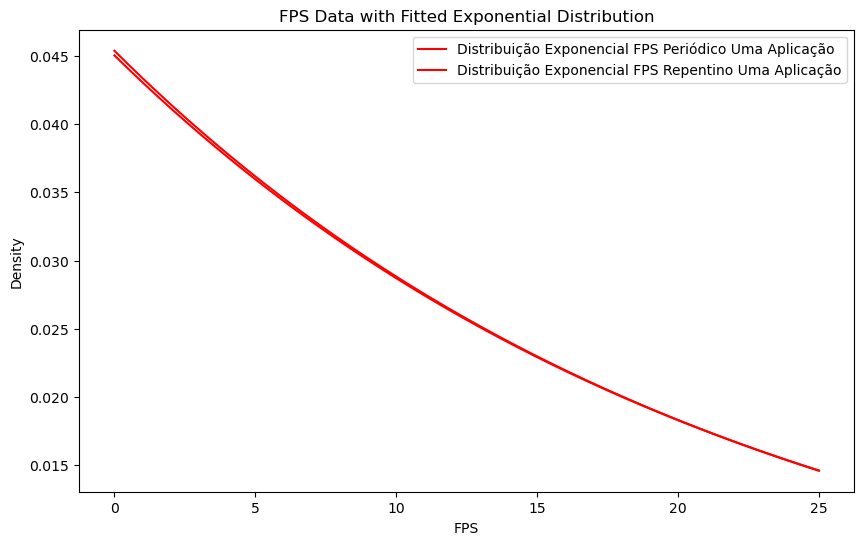

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

params = expon.fit(y_video_vod_sa_periodic)
x = np.linspace(0, max(y_video_vod_sa_periodic['DispFrames']), 1000)
pdf_fitted = expon.pdf(x, *params)

params_sa_flash = expon.fit(y_video_vod_sa_flash)
x_sa_flash = np.linspace(0, max(y_video_vod_sa_flash['DispFrames']), 1000)
pdf_fitted_sa_flash = expon.pdf(x_sa_flash, *params_sa_flash)


plt.figure(figsize=(10, 6))
plt.plot(x, pdf_fitted, 'r-', label='Distribuição Exponencial FPS Periódico Uma Aplicação')
plt.plot(x_sa_flash, pdf_fitted_sa_flash, 'r-', label='Distribuição Exponencial FPS Repentino Uma Aplicação')
plt.title('FPS Data with Fitted Exponential Distribution')
plt.xlabel('FPS')
plt.ylabel('Density')
plt.legend()
plt.show()

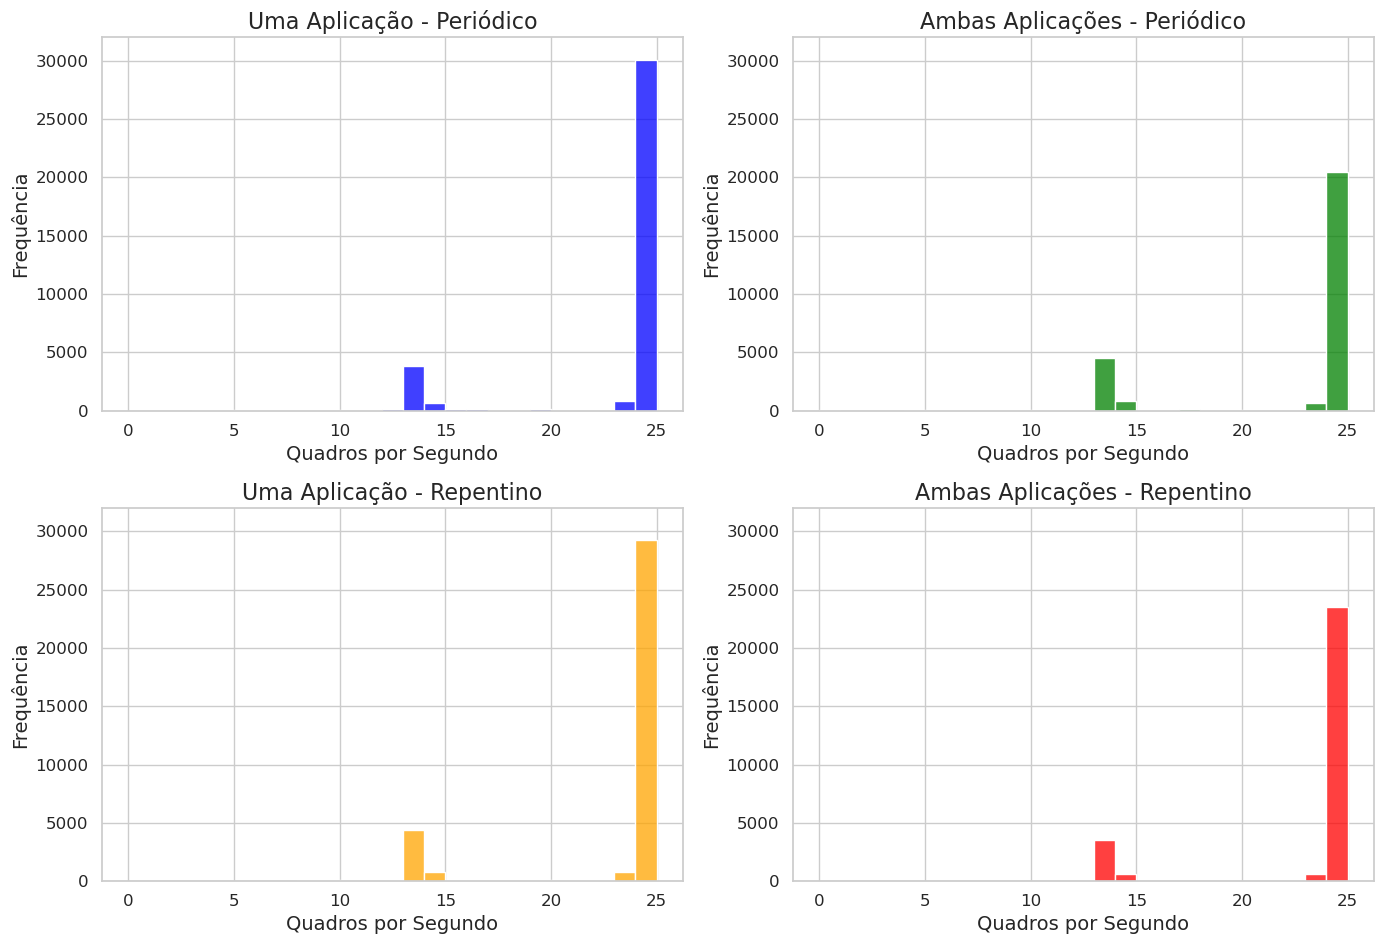

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded your data as described
# Example data (replace with your actual data loading logic)
# y_video_vod_sa_periodic, y_video_vod_ba_periodic, y_video_vod_sa_flash, y_video_vod_ba_flash

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#fig.suptitle('Distribuição de Quadros por Segundo', fontsize=20)  # Increased title font size

# Define the maximum y-axis value
y_max = 32000

# Plot histograms for each dataset
sns.histplot(y_video_vod_sa_periodic["DispFrames"], bins=25, kde=False, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Uma Aplicação - Periódico', fontsize=16)  # Increased title font size
axes[0, 0].set_xlabel('Quadros por Segundo', fontsize=14)  # Increased x-label font size
axes[0, 0].set_ylabel('Frequência', fontsize=14)  # Increased y-label font size
axes[0, 0].set_ylim(0, y_max)  # Set y-axis limit
axes[0, 0].tick_params(axis='both', labelsize=12)  # Increased tick label font size

sns.histplot(y_video_vod_ba_periodic["DispFrames"], bins=25, kde=False, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Ambas Aplicações - Periódico', fontsize=16)
axes[0, 1].set_xlabel('Quadros por Segundo', fontsize=14)
axes[0, 1].set_ylabel('Frequência', fontsize=14)
axes[0, 1].set_ylim(0, y_max)  # Set y-axis limit
axes[0, 1].tick_params(axis='both', labelsize=12)

sns.histplot(y_video_vod_sa_flash["DispFrames"], bins=25, kde=False, color='orange', ax=axes[1, 0])
axes[1, 0].set_title('Uma Aplicação - Repentino', fontsize=16)
axes[1, 0].set_xlabel('Quadros por Segundo', fontsize=14)
axes[1, 0].set_ylabel('Frequência', fontsize=14)
axes[1, 0].set_ylim(0, y_max)  # Set y-axis limit
axes[1, 0].tick_params(axis='both', labelsize=12)

sns.histplot(y_video_vod_ba_flash["DispFrames"], bins=25, kde=False, color='red', ax=axes[1, 1])
axes[1, 1].set_title('Ambas Aplicações - Repentino', fontsize=16)
axes[1, 1].set_xlabel('Quadros por Segundo', fontsize=14)
axes[1, 1].set_ylabel('Frequência', fontsize=14)
axes[1, 1].set_ylim(0, y_max)  # Set y-axis limit
axes[1, 1].tick_params(axis='both', labelsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect to make space for the suptitle
plt.show()